<a href="https://colab.research.google.com/github/bernebas/Bernebas/blob/main/HW4_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 4

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Thursday October 2, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

<hr><hr>

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

<hr>

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.

<hr>

## Ans.

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(67)
number_of_passengers = 10000
time_arrvial = np.random.uniform(0,1000, size = number_of_passengers)

train_arrvial_interval = 10
waiting_times = train_arrvial_interval - (time_arrvial % train_arrvial_interval)

avg_waiting_time = np.average(waiting_times)

print('the avg waiting time is ' +  str(avg_waiting_time))
print(f'the avg waiting time is {avg_waiting_time}')

std_error = np.std(waiting_times, ddof=1) / np.sqrt(number_of_passengers)
ci_lower = avg_waiting_time - 1.96 * std_error
ci_upper = avg_waiting_time + 1.96 * std_error

print(ci_lower)

print(f"95% CI: [{ci_lower}, {ci_upper}]")


the avg waiting time is 4.970965873971961
the avg waiting time is 4.970965873971961
4.914281188423092
95% CI: [4.914281188423092, 5.02765055952083]


<hr>

**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.

<hr>

## Ans.

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(67)
number_of_passengers = 10000
time_arrvial = np.random.uniform(0,1000, size = number_of_passengers)

train_arrvial_interval = []
t = 0

while t < 1000: #gonna add to t a random time from the distubtion that tells us what time the train arrivwed
  t += np.random.exponential(scale=10)
  train_arrvial_interval.append(t)

train_arrvial_interval = np.array(train_arrvial_interval)


waiting_times = []
for passenger in time_arrvial:
    idx = np.searchsorted(train_arrvial_interval, passenger)  # first train after passenger
    waiting_time = train_arrvial_interval[idx] - passenger
    waiting_times.append(waiting_time)

waiting_times = np.array(waiting_times)

avg_waiting_time = np.mean(waiting_times)
print(f"Average waiting time: {avg_waiting_time:.3f}")

std_error = np.std(waiting_times, ddof=1) / np.sqrt(number_of_passengers)
ci_lower = avg_waiting_time - 1.96 * std_error
ci_upper = avg_waiting_time + 1.96 * std_error
print(f"95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]")

Average waiting time: 11.549
95% CI: [11.302, 11.797]


<hr>

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

<hr>

In [ ]:

train_times_obs = train_arrvial_interval[train_arrvial_interval <= 1000]

gaps = np.diff(train_times_obs)

n_gaps = len(gaps)
mean_gap = np.mean(gaps)
se_gap = np.std(gaps, ddof=1) / np.sqrt(n_gaps)
ci_low = mean_gap - 1.96 * se_gap
ci_high = mean_gap + 1.96 * se_gap

print(f"# gaps used: {n_gaps}")
print(f"Mean inter-arrival time: {mean_gap:.3f} min")
print(f"95% CI for mean gap: [{ci_low:.3f}, {ci_high:.3f}]")

=


# gaps used: 101
Mean inter-arrival time: 9.844 min
95% CI for mean gap: [7.653, 12.035]
Rate estimate (lambda): 0.1016 per minute


<hr>

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

<hr>

## Ans.

In [ ]:
import numpy as np

np.random.seed(67)
N = 10_000
T_MAX = 1000


passengers = np.random.uniform(0, T_MAX, size=N)


trains_det = np.arange(0, T_MAX + 10, 10)  # 0,10,20,...

idx_next = np.searchsorted(trains_det, passengers, side='left')
idx_prev = np.clip(idx_next - 1, 0, None)

intervals_det = trains_det[idx_next] - trains_det[idx_prev]

mean_I_det = intervals_det.mean()
se_I_det   = intervals_det.std(ddof=1)/np.sqrt(len(intervals_det))
ci_det     = (mean_I_det - 1.96*se_I_det, mean_I_det + 1.96*se_I_det)

print(f"(a) mean I_i: {mean_I_det:.3f}   95% CI: [{ci_det[0]:.3f}, {ci_det[1]:.3f}]")


lam = 1/10
train_times = []
t = 0.0
while t < T_MAX:
    t += np.random.exponential(scale=1/lam)  # mean = 10
    train_times.append(t)
train_times = np.array(train_times)

idx_next = np.searchsorted(train_times, passengers, side='left')

mask = idx_next > 0
p_use = passengers[mask]
idx_next = idx_next[mask]
idx_prev = idx_next - 1

intervals_exp = train_times[idx_next] - train_times[idx_prev]

mean_I_exp = intervals_exp.mean()
se_I_exp   = intervals_exp.std(ddof=1)/np.sqrt(len(intervals_exp))
ci_exp     = (mean_I_exp - 1.96*se_I_exp, mean_I_exp + 1.96*se_I_exp)

print(f"(b) mean I_i: {mean_I_exp:.3f}   95% CI: [{ci_exp[0]:.3f}, {ci_exp[1]:.3f}]")


(a) mean I_i: 10.000   95% CI: [10.000, 10.000]
(b) mean I_i: 23.019   95% CI: [22.659, 23.379]


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

<hr><hr>

# Question 2: Generating random samples in some given set (20 pts)

<hr>

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).

<hr>

## Ans.

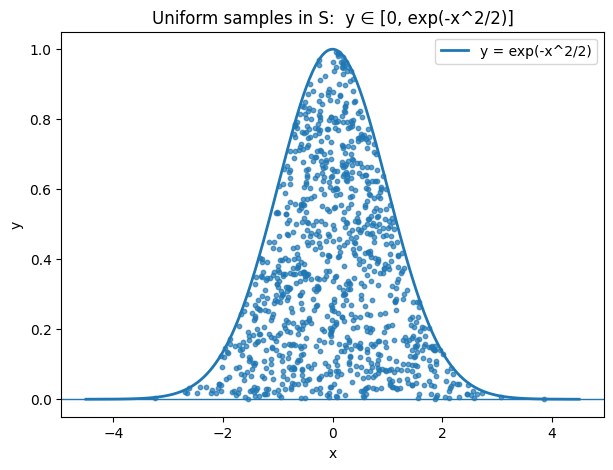

In [ ]:
# Generate 1000 uniform samples in S = { (x,y) : y in [0, exp(-x^2 / 2)] }
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n = 1000

X = np.random.normal(loc=0.0, scale=1.0, size=n)

Z = np.random.rand(n)
Y = Z * np.exp(-0.5 * X**2)

x_curve = np.linspace(-4.5, 4.5,500)
y_curve = np.exp(-0.5 * x_curve**2)

plt.figure(figsize=(7,5))
plt.scatter(X, Y, s=10, alpha=0.7)
plt.plot(x_curve, y_curve, linewidth=2, label="y = exp(-x^2/2)")
plt.axhline(0, linewidth=1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Uniform samples in S:  y ∈ [0, exp(-x^2/2)]")
plt.legend()
plt.show()


<hr>

**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).

<hr>

## Ans.

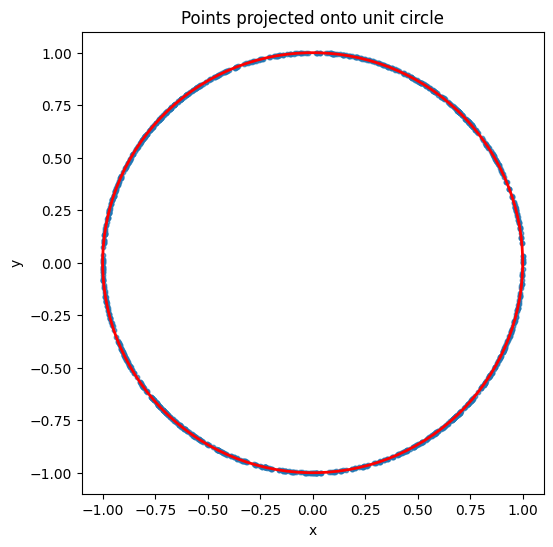

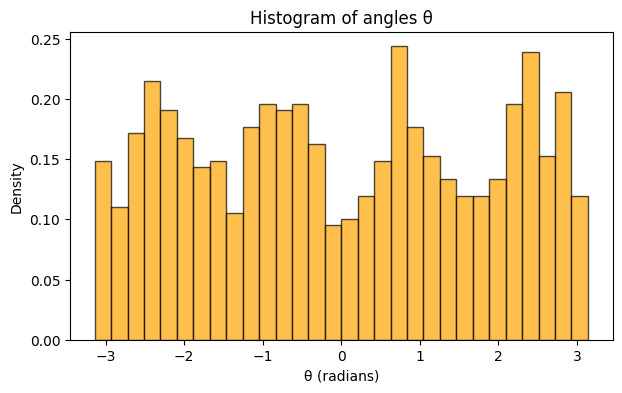

In [ ]:
# Q2(b): Sampling uniformly on the unit circle by projecting uniform points in the square [-1,1]^2
n = 1000

# Step 1: generate (U,V) uniformly in [-1,1]^2
U = np.random.uniform(-1, 1, n)
V = np.random.uniform(-1, 1, n)

# Step 2: project onto the circle
norms = np.sqrt(U**2 + V**2)
X = U / norms
Y = V / norms

# Step 3: compute angles theta = atan2(Y,X)
theta = np.arctan2(Y, X)

# Plot the samples on the unit circle
plt.figure(figsize=(6,6))
plt.scatter(X, Y, s=10, alpha=0.7)
circle = plt.Circle((0,0), 1, fill=False, color="red", linewidth=2)
plt.gca().add_artist(circle)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Points projected onto unit circle")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Histogram of angles
plt.figure(figsize=(7,4))
plt.hist(theta, bins=30, density=True, alpha=0.7, color="orange", edgecolor="black")
plt.title("Histogram of angles θ")
plt.xlabel("θ (radians)")
plt.ylabel("Density")
plt.show()


<hr>

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$), and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

<hr>

## Ans.

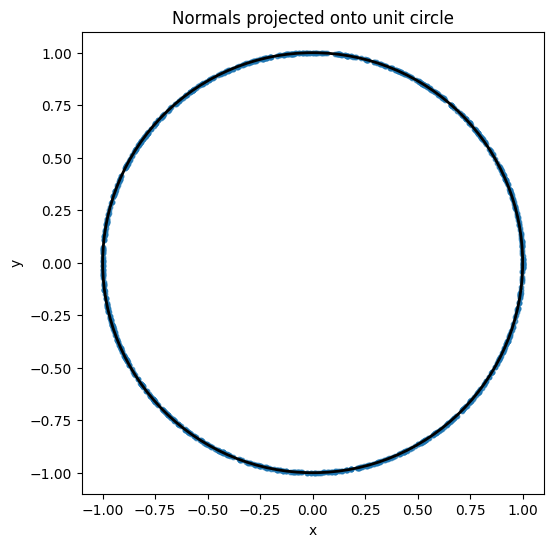

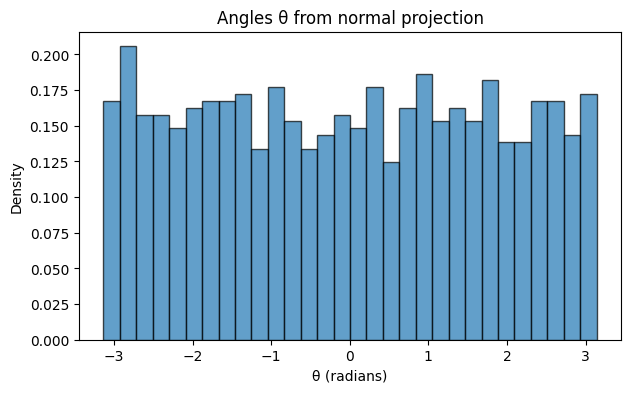

In [ ]:
# Re-run Q2(c) cell (fresh state).

import numpy as np
import matplotlib.pyplot as plt

n = 1000

Z = np.random.normal(size=n)
W = np.random.normal(size=n)

R = np.sqrt(Z**2 + W**2)
Xc = Z / R
Yc = W / R

theta_c = np.arctan2(Yc, Xc)

plt.figure(figsize=(6,6))
plt.scatter(Xc, Yc, s=10, alpha=0.7)
circle = plt.Circle((0,0), 1, fill=False, linewidth=2)
plt.gca().add_artist(circle)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Normals projected onto unit circle")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(theta_c, bins=30, density=True, alpha=0.7, edgecolor="black")
plt.title("Angles θ from normal projection")
plt.xlabel("θ (radians)")
plt.ylabel("Density")
plt.show()


<hr><hr>

# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?



## Ans.


Here the three annual returns are independent normals:

- $X_1 \sim \mathcal{N}(\mu_1 = 0.14,\ \sigma_1^2 = 0.0625) \;\;\Rightarrow\;\; \sigma_1 = 0.25$
- $X_2 \sim \mathcal{N}(\mu_2 = 0.07,\ \sigma_2^2 = 0.01) \;\;\Rightarrow\;\; \sigma_2 = 0.10$
- $X_3 \sim \mathcal{N}(\mu_3 = 0.16,\ \sigma_3^2 = 0.09) \;\;\Rightarrow\;\; \sigma_3 = 0.30$

For a normal random variable $X \sim \mathcal{N}(\mu,\sigma^2)$,  

$$
P(X > 0) = \Phi\!\left(\frac{\mu}{\sigma}\right),
$$  

where $\Phi(\cdot)$ is the standard normal CDF.

---

### Step 1: Compute $z$-scores

$$
z_1 = \frac{0.14}{0.25} = 0.56
\quad \Rightarrow \quad \Phi(z_1) \approx 0.7123
$$

$$
z_2 = \frac{0.07}{0.10} = 0.70
\quad \Rightarrow \quad \Phi(z_2) \approx 0.7580
$$

$$
z_3 = \frac{0.16}{0.30} \approx 0.5333
\quad \Rightarrow \quad \Phi(z_3) \approx 0.7031
$$

---

### Step 2: Probability all three are positive

By independence,

$$
P(X_1 > 0,\, X_2 > 0,\, X_3 > 0)
= \prod_{i=1}^3 \Phi(z_i).
$$

$$
P \approx 0.7123 \times 0.7580 \times 0.7031
$$

$$
P \approx \mathbf{0.380}
$$

---

So there is about a **38%** chance that all three yield a positive return.


<hr>

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
<hr>

## Ans.

## Q3(b): Correlated case via Cholesky (simulation)

We want $X \sim \mathcal{N}(\mu,\Sigma)$ with

$$
\mu =
\begin{bmatrix}
0.14 \\
0.07 \\
0.16
\end{bmatrix},
\quad
\Sigma =
\begin{bmatrix}
0.0625 & -0.01   & 0.0375 \\
-0.01  &  0.01   & -0.015 \\
0.0375 & -0.015  & 0.09
\end{bmatrix}.
$$

We generate $Z \sim \mathcal{N}(0,I_3)$ i.i.d. and set  

$$
X = \mu + L Z,
$$

where $L = \text{chol}(\Sigma)$ (lower triangular).  
Equivalently in NumPy: `X = mu + Z @ L.T`, which ensures  

$$
\text{Cov}(X) = L L^\top = \Sigma.
$$

We then estimate

$$
p = \mathbb{P}(X_1>0, \, X_2>0, \, X_3>0)
$$

by simulation.


In [ ]:
import numpy as np
from scipy.linalg import cholesky

# ----- inputs -----
mu = np.array([0.14, 0.07, 0.16])
Sigma = np.array([
    [0.0625, -0.01,   0.0375],
    [-0.01,   0.01,  -0.015 ],
    [0.0375, -0.015,  0.09  ],
])

# Cholesky factor (lower-triangular): Sigma = L @ L.T
L = cholesky(Sigma, lower=True)

# ----- simulation settings -----
rng = np.random.default_rng(42)  # reproducible seed
N = 1_000_000                     # total draws (adjust as you like)
batch = 100_000                   # do it in batches to keep memory low

def estimate_prob(N, batch=100_000, sanity_check=False):
    hits = 0
    n_done = 0

    # (Optional) accumulators for sanity check
    if sanity_check:
        sum_x = np.zeros(3)
        sum_xxT = np.zeros((3,3))

    while n_done < N:
        m = min(batch, N - n_done)
        # Z ~ iid standard normals
        Z = rng.standard_normal(size=(m, 3))
        # X = mu + Z @ L.T  (rows = samples)
        X = mu + Z @ L.T

        hits += np.count_nonzero(np.all(X > 0, axis=1))
        n_done += m

        if sanity_check:
            sum_x += X.sum(axis=0)
            sum_xxT += X.T @ X

    p_hat = hits / N
    # Monte Carlo standard error and 95% CI for a proportion
    se = np.sqrt(p_hat * (1 - p_hat) / N)
    ci = (p_hat - 1.96*se, p_hat + 1.96*se)

    results = {"p_hat": p_hat, "se": se, "ci95": ci}

    if sanity_check:
        mean_hat = sum_x / N
        cov_hat = (sum_xxT / N) - np.outer(mean_hat, mean_hat)
        results["mean_hat"] = mean_hat
        results["cov_hat"] = cov_hat

    return results

res = estimate_prob(N, batch=batch, sanity_check=True)

print(f"Estimated P(all three > 0): {res['p_hat']:.4f}")
print(f"Monte Carlo SE: {res['se']:.4f}")
print(f"95% CI: [{res['ci95'][0]:.4f}, {res['ci95'][1]:.4f}]")

print("\nSanity check (empirical moments):")
print("Sample mean ≈", np.round(res["mean_hat"], 4))
print("Sample cov ≈\n", np.round(res["cov_hat"], 4))


Estimated P(all three > 0): 0.3704
Monte Carlo SE: 0.0005
95% CI: [0.3694, 0.3713]

Sanity check (empirical moments):
Sample mean ≈ [0.1399 0.0701 0.16  ]
Sample cov ≈
 [[ 0.0624 -0.01    0.0374]
 [-0.01    0.01   -0.015 ]
 [ 0.0374 -0.015   0.09  ]]


<hr><hr>

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

<hr>

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.

<hr>

## Ans.



We want a uniform distribution on $$([ \alpha, \beta ])$$ with mean (0) and variance (1).

---

**Step 1: Mean condition**

$$
\mathbb{E}[U] = \frac{\alpha + \beta}{2} = 0
;;;\Rightarrow;;; \beta = -\alpha
$$

---

**Step 2: Variance condition**

$$
\mathrm{Var}(U) = \frac{(\beta - \alpha)^2}{12} = 1
$$

Substitute (\beta = -\alpha):

$$
\frac{(-\alpha - \alpha)^2}{12}
= \frac{(2\alpha)^2}{12}
= \frac{4\alpha^2}{12}
= \frac{\alpha^2}{3} = 1
$$

$$
\alpha^2 = 3
$$

---

**Step 3: Solve for bounds**

$$
\alpha = -\sqrt{3}, \quad \beta = \sqrt{3}
$$

---

**Final Answer:**

$$
\boxed{\alpha = -\sqrt{3}, ; \beta = \sqrt{3}}
$$




<hr>

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?

<hr>

## Ans.




We want to compute:
$$
(\mathbb{E}[V_2]) and (\mathrm{Var}(V_2)), where
$$

$$
V_1 = X_1,
\quad
V_2 = (1-B)X_1 + B X_2
$$

with $$ (X_1, X_2 \sim \text{Uniform}[-\sqrt{3}, \sqrt{3}]) i.i.d. $$ and $$(B \sim \text{Bernoulli}(p))$$.

---

**Step 1: Expectation**

$$
\mathbb{E}[V_2] = (1-p)\mathbb{E}[X_1] + p\mathbb{E}[X_2]
$$

Since $$(\mathbb{E}[X_1] = \mathbb{E}[X_2] = 0)$$:

$$
\mathbb{E}[V_2] = 0
$$

---

**Step 2: Variance**

$$
\mathrm{Var}(V_2) = \mathbb{E}[V_2^2] - (\mathbb{E}[V_2])^2
$$

Condition on (B):

$$
\mathbb{E}[V_2^2] = (1-p)\mathbb{E}[X_1^2] + p\mathbb{E}[X_2^2]
$$

Since $$(\mathrm{Var}(X_1) = \mathrm{Var}(X_2) = 1) and (\mathbb{E}[X_i] = 0):$$

$$
\mathbb{E}[X_1^2] = \mathbb{E}[X_2^2] = 1
$$

Thus:

$$
\mathbb{E}[V_2^2] = (1-p)(1) + p(1) = 1
$$

So:

$$
\mathrm{Var}(V_2) = 1
$$

---

**Final Answer:**

$$
\boxed{\mathbb{E}[V_2] = 0, \quad \mathrm{Var}(V_2) = 1}
$$



<hr>

**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?

<hr>


---

We want to find the value of (p) such that

$$
\mathrm{Cov}(V_1, V_2) = \sigma_{12}, \quad \sigma_{12} \geq 0
$$

with

$$
V_1 = X_1,
\quad
V_2 = (1-B)X_1 + B X_2
$$

---

**Step 1: Recall covariance formula**

$$
\mathrm{Cov}(V_1, V_2) = \mathbb{E}[V_1 V_2] - \mathbb{E}[V_1]\mathbb{E}[V_2]
$$

$$
Since (\mathbb{E}[V_1] = \mathbb{E}[V_2] = 0):
$$

$$
\mathrm{Cov}(V_1, V_2) = \mathbb{E}[V_1 V_2]
$$

---

**Step 2: Expand (V_1 V_2)**

$$
V_1 V_2 = X_1 \big( (1-B)X_1 + B X_2 \big) = (1-B)X_1^2 + B(X_1 X_2)
$$

Take expectation:

$$
\mathbb{E}[V_1 V_2] = (1-p)\mathbb{E}[X_1^2] + p\mathbb{E}[X_1 X_2]
$$

---

**Step 3: Simplify using independence**

Since (X_1 \perp X_2):

$$
\mathbb{E}[X_1 X_2] = \mathbb{E}[X_1]\mathbb{E}[X_2] = 0
$$

$$
Also, (\mathbb{E}[X_1^2] = 1).
$$

So:

$$
\mathrm{Cov}(V_1, V_2) = (1-p)(1) + p(0) = 1 - p
$$

---

**Step 4: Solve for (p)**

We require:

$$
1 - p = \sigma_{12}
$$

So:

$$
p = 1 - \sigma_{12}
$$

---

**Final Answer:**

$$
\boxed{p = 1 - \sigma_{12}}, \quad 0 \leq \sigma_{12} \leq 1
$$





<hr>

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

<hr>

## Ans.

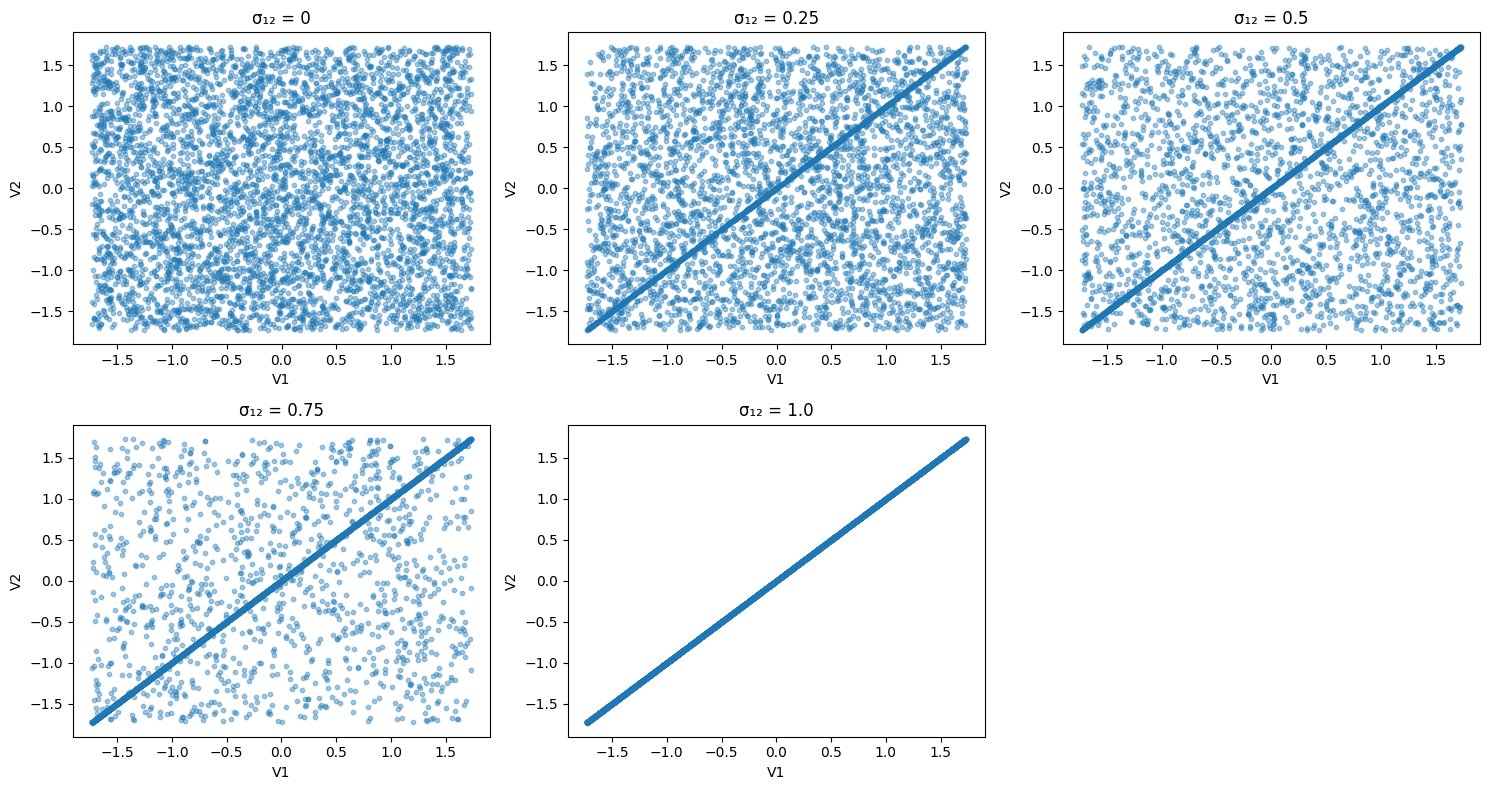

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate correlated uniforms
def generate_uniforms(n, sigma12):
    # p is chosen so that Cov(V1, V2) = sigma12
    p = 1 - sigma12

    # Step 1: Generate X1, X2 ~ Uniform(-sqrt(3), sqrt(3)) i.i.d.
    X1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), n)
    X2 = np.random.uniform(-np.sqrt(3), np.sqrt(3), n)

    # Step 2: Generate Bernoulli(p)
    B = np.random.binomial(1, p, n)

    # Step 3: Define V1, V2
    V1 = X1
    V2 = (1 - B) * X1 + B * X2

    return V1, V2

# Plotting scatter plots for different covariance values
n = 5000
sigma_vals = [0, 0.25, 0.5, 0.75, 1.0]

plt.figure(figsize=(15, 8))

for i, sigma12 in enumerate(sigma_vals, 1):
    V1, V2 = generate_uniforms(n, sigma12)
    plt.subplot(2, 3, i)
    plt.scatter(V1, V2, alpha=0.4, s=10)
    plt.title(f"σ₁₂ = {sigma12}")
    plt.xlabel("V1")
    plt.ylabel("V2")

plt.tight_layout()
plt.show()


<hr>

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').

<hr>

## Ans.

In [30]:
import numpy as np

# Using the generate_uniforms function from part (d)
# (redefine here just in case)

def generate_uniforms(n, sigma12):
    # p is chosen so that Cov(V1, V2) = sigma12
    p = 1 - sigma12

    # Step 1: Generate X1, X2 ~ Uniform(-sqrt(3), sqrt(3)) i.i.d.
    X1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), n)
    X2 = np.random.uniform(-np.sqrt(3), np.sqrt(3), n)

    # Step 2: Generate Bernoulli(p)
    B = np.random.binomial(1, p, n)

    # Step 3: Define V1, V2
    V1 = X1
    V2 = (1 - B) * X1 + B * X2

    return V1, V2

# Part (e): Compute probability P[V1 <= 0, V2 <= 0] for σ12 = 0.5
n = 1_000_000  # large sample size for accuracy
sigma12 = 0.5

V1, V2 = generate_uniforms(n, sigma12)

# Estimate probability
prob = np.mean((V1 <= 0) & (V2 <= 0))
print(f"Estimated P[V1 <= 0, V2 <= 0] for σ12={sigma12}: {prob:.4f}")


Estimated P[V1 <= 0, V2 <= 0] for σ12=0.5: 0.3746


<hr>

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

<hr>

## Ans.





Let $$\Phi(\cdot)$$ be the standard normal CDF. Generate $$(Z_1,Z_2)$$ as a bivariate normal with

$$
\Sigma=\begin{pmatrix}1 & 0.5[2pt] 0.5 & 1\end{pmatrix}.
$$

Define

$$
W_1=\alpha+(\beta-\alpha),\Phi(Z_1),
\qquad
W_2=\alpha+(\beta-\alpha),\Phi(Z_2).
$$

**Why are (W_1,W_2) uniform on ([\alpha,\beta])?**
By the probability integral transform, $$U_i=\Phi(Z_i)\sim \text{Unif}[0,1]$$ (marginally).
An affine map of a uniform stays uniform, so

$$
W_i=\alpha+(\beta-\alpha)U_i\sim \text{Unif}[\alpha,\beta]\quad (i=1,2).
$$

With $$\alpha=-\sqrt{3},\ \beta=\sqrt{3},$$ we have

$$
\mathbb{E}[W_i]=\frac{\alpha+\beta}{2}=0, \qquad
\mathrm{Var}(W_i)=\frac{(\beta-\alpha)^2}{12}=1.
$$

For $$\sigma_{12}=0.5$$ (i.e., correlation (0.5) for ((Z_1,Z_2))), generate (W_1,W_2), make a scatter plot, and compute

$$
\mathbb{P}[W_1\ge 0,; W_2\ge 0].
$$

Note the threshold $$W_i\ge 0 \iff \Phi(Z_i)\ge \tfrac{1}{2} \iff Z_i\ge 0,$$ so the theoretical value is the bivariate normal orthant probability

$$
\mathbb{P}[Z_1\ge 0,\ Z_2\ge 0]
$$

$$\frac{1}{4}+\frac{1}{2\pi}\arcsin(\rho) $$
$$\quad(\rho=0.5)$$

$$
\frac{1}{4}+\frac{1}{12}
$$

$$\frac{1}{3}\approx 0.3333$$






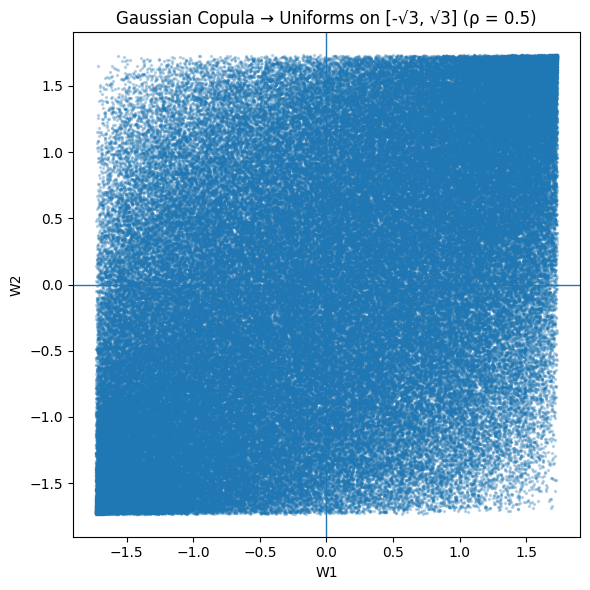

Empirical  P[W1 >= 0, W2 >= 0] ≈ 0.3326
Theoretical P[W1 >= 0, W2 >= 0] = 0.3333 (≈ 1/3)


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from math import asin, pi

# ---- Robust standard normal CDF ----
# Uses SciPy if present; otherwise falls back to vectorized math.erf
try:
    from scipy.stats import norm
    def stdnorm_cdf(z):
        return norm.cdf(z)
except Exception:
    from math import erf
    def stdnorm_cdf(z):
        z = np.asarray(z, dtype=float)
        return 0.5 * (1.0 + np.vectorize(erf)(z / np.sqrt(2.0)))

# ---- Gaussian-copula uniforms on [alpha, beta] ----
def generate_copula_uniforms(n, rho, alpha=-np.sqrt(3), beta=np.sqrt(3), seed=None):
    if seed is not None:
        np.random.seed(seed)
    mean = np.array([0.0, 0.0])
    cov  = np.array([[1.0, rho],
                     [rho, 1.0]])
    Z = np.random.multivariate_normal(mean, cov, size=n)  # shape (n, 2)
    U = stdnorm_cdf(Z)                                    # map to Unif(0,1) marginally
    W = alpha + (beta - alpha) * U                        # map to [alpha, beta]
    return W[:, 0], W[:, 1]

# ---- Demo for rho = 0.5 ----
n   = 200_000
rho = 0.5
alpha, beta = -np.sqrt(3), np.sqrt(3)

W1, W2 = generate_copula_uniforms(n, rho, alpha, beta, seed=42)

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(W1, W2, s=2, alpha=0.25)
plt.axvline(0, linewidth=1)
plt.axhline(0, linewidth=1)
plt.title("Gaussian Copula → Uniforms on [-√3, √3] (ρ = 0.5)")
plt.xlabel("W1"); plt.ylabel("W2")
plt.tight_layout(); plt.show()

# Empirical and theoretical P[W1 >= 0, W2 >= 0]
emp_prob = np.mean((W1 >= 0) & (W2 >= 0))
theory_prob = 0.25 + (1.0 / (2.0 * pi)) * asin(rho)  # 1/4 + arcsin(rho)/(2π)

print(f"Empirical  P[W1 >= 0, W2 >= 0] ≈ {emp_prob:.4f}")
print(f"Theoretical P[W1 >= 0, W2 >= 0] = {theory_prob:.4f} (≈ 1/3)")
